### Render of Sound Python example
#### 1.1) Introduction
In this example we use Python to create a project with sound and then send it to be rendered
by the SToV Render App directly.

In [1]:
import sys
import math
import json
import shutil
import copy
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

from stovpy import utils, project, filters, audio, renderer
from stovpy import asset as ass


#### 1.2) Initiate Project
Inintialise the project and add the assets we want. A reactive asset and a video asset.

In [109]:
proj_ = project.SToVProject()
json_var = proj_.rtn_json()

## Add video asset
uniqID = utils.generate_uniqID()
path = "output_h264.mp4"
type_params = {"file_name":path, 'fs':"/Users/dominicwaithe/Documents/webpages/soundtovision/misc/tests/standard videos/output_h264.mp4", 'ftype':'full'}
asset = ass.SToVAsset('video1', 'video',0,30, 0,0,1920, 1080, type_params)
asset.layer = 1
json_var['project_file'][uniqID] = asset.rtn_json()

## Add reactive asset.
uniqID = utils.generate_uniqID()
reactive_path = "/Users/dominicwaithe/Documents/webpages/soundtovision/project/json/bars_spectro.json"
type_params = json.load(open(reactive_path,))
asset = ass.SToVAsset('bars_spectro', 'reactive',0,30, 0,0, 1920, 1080, type_params)
asset.layer = 2
json_var['project_file'][uniqID] = asset.rtn_json()

#### 1.3) Add Sound
Reactive elements work especially well with a sound input. To do this we generate an ogg file which is cropped to the required render time period. Here we import and visualise the sound file. During the render we generate and copy the ogg file to the temporary folder of the rendering software.

(9560448, 2)
sample_rate 48000


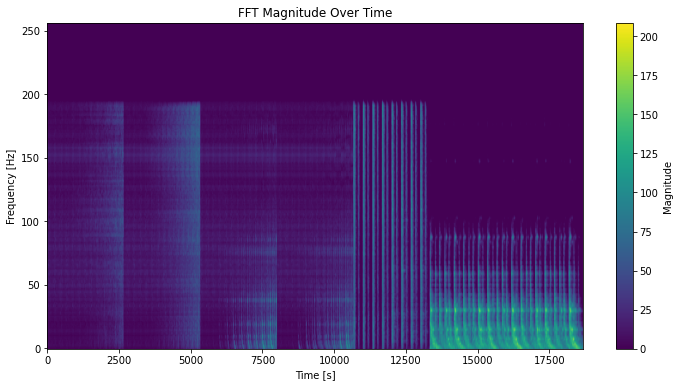

In [72]:
# Example usage
filename = 'test_audio/Drumdrum 01b.wav'  # Replace with your file path
audio_file = audio.SToVAudio(filename)
byte_frequency_data, sample_rate = audio_file.process_wave_file(proj.fft_size, 0.0)
print('sample_rate',sample_rate)
# Display the byte frequency data
plt.figure(figsize=(12, 6))
plt.imshow(np.array(byte_frequency_data)[:,:].T, aspect='auto', cmap='viridis', origin='lower')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Magnitude')
plt.title('FFT Magnitude Over Time')
plt.show()

#### 1.4) Setup Render

In [97]:
#Render settings.
render_settings = {}
render_settings['sample_rate'] = sample_rate
render_settings['fftSize'] = proj.fft_size
render_settings['fps'] = 60
render_settings['fourk'] = False
render_settings['render_id'] = 'video_test'
render_settings['start_time'] = 0
render_settings['end_time'] = 30.0
render_settings['audio'] = True
render_settings['num_cores'] = 2
render_settings['limit_rate'] = 100


In [112]:
#Initiate the renderer
render = renderer.SToVRender(json_var['project_file'], json_var['document_settings'], render_settings, audio_file)

In [113]:
#Start the renderer.
render.start_render()

self.num_of_segs 6
 render progress: [#########################] 100% FPS: 08.48 complete


#### 1.5) Visualise video output

In [114]:
from IPython.display import Video
Video("test_outputs/s2v-video_test.mp4", width=640, height=480)